# rlearn
Learning machine learning algorithms.

# Table of Contents
- [Linear Models](#Linear-Models)  
    - [Binary Classification](#binary-classification)  
        - [Standard Perceptron](#standard-perceptron)  
        - [Logistic Regression](#perceptron-with-sigmoid-activation)
    - [Regression](#regression)  
        - [Ordinary Least Squares](#ordinary-least-squares)
        - [Linear Regression](#perceptron-with-linear-activation)
        - [Elastic Net](#elastic-net)
- [Neural Networks](#neural-networks)  
    - [Regression](#regression-with-neural-network)  
        - [Multilayer Perceptron](#multilayer-perceptron)
    - [Multiclass Classification](#multiclass-classification)  
        - [Multilayer Perceptron](#multilayer-perceptron-classification)
        - [Convolutional Neural Network](#convolutional-neural-network)  
- [Trees](#trees)
    - [Regression](#regression-with-trees)  
        - [Decision Tree](#decision-tree-regressor)  
        - [Random Forest](#random-forest-regressor)  
        - [Gradient Boosting Regressor](#gradient-boosting-regressor)
    - [Classification](#classification-with-trees)  
        - [Decision Tree](#decision-tree-classifier)
        - [Random Forest](#random-forest-classifier)
        - [Gradient Boosting Classifier](#gradient-boosting-classifier)
- [Clusters](#clusters)
    - [K-Means](#k-means)
    - [DBSCAN](#dbscan)
- [Neighbors](#neighbours)  
    - [Classification](#classification-with-knn)  
        - [K-Nearest Neighbors](#k-nearest-neighbours-classifier)
    - [Regression](#regression-with-knn)
        - [K-Nearest Neighbors Regressor](#k-nearest-neighbours-regressor)
- [Bayes](#bayes)
    - [Gaussian Naive Bayes](#gaussiannb)

## [Linear Models](rlearn\linear_model.py)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from rlearn.solvers import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error, classification_report

np.set_printoptions(precision=2, suppress=1)

### Binary Classification

Dataset used for binary classification examples:

In [2]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#### Standard Perceptron

In [3]:
from rlearn.linear_model import Perceptron

standard_perceptron = Perceptron(
    solver="perceptron", activation="step", loss_function="perceptron"
)
standard_perceptron.fit(X_train, y_train)

print(classification_report(y_test, standard_perceptron.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.92      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.95      0.95      0.95       114



#### Perceptron with  Sigmoid Activation
Which is equivalent to a Logistic Regression

In [4]:
logistic_model = Perceptron(activation="sigmoid", loss_function="logloss")
logistic_model.fit(X_train, y_train)

print(classification_report(y_test, logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        43
           1       0.97      0.89      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



### Regression

Dataset used for regression examples

In [5]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#### Ordinary Least Squares

In [6]:
from rlearn.linear_model import OLS

ols = OLS()
ols.fit(X_train, y_train)
print("Mean Squared Error:", mean_squared_error(y_test, ols.predict(X_test)))

Mean Squared Error: 2900.1936284934795


#### Perceptron with Linear Activation
Which is equivalent to a simple Linear Regression

In [7]:
linear_regression = Perceptron(
    activation="linear",
    solver=StochasticGradientDescent(learning_rate=0.1, momentum=0.9),
)
linear_regression.fit(X_train, y_train, epochs=100000)
print(
    "Mean Squared Error:", mean_squared_error(y_test, linear_regression.predict(X_test))
)

Mean Squared Error: 2892.293793887584


#### Elastic Net

In [8]:
from rlearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1, l1_ratio=1, learning_rate=0.01, solver="sgd")
elastic_net.fit(X_train, y_train, verbose=0, epochs=100000)
print("Mean Squared Error:", mean_squared_error(y_test, elastic_net.predict(X_test)))

Mean Squared Error: 2945.2120204910398


## [Neural Networks](rlearn/nn.py)  
<sub>[Back to top.](#table-of-contents)</sub>


### Regression with Neural Network

#### Multilayer Perceptron

In [9]:
from rlearn.nn import NNModel, FC
from rlearn.activation_functions import *
from rlearn.regularization import Regularization

mlp_regularization = NNModel(
    loss="mse",
    input_dim=X_train.shape[1:],
    layers=[
        FC(16, regularization=Regularization(alpha=1, l1_ratio=1)),
        FC(1, activation=Relu()),
    ],
)

mlp_regularization.fit(X_train, y_train, X_test, y_test, epochs=50000, verbose=10000)
print(
    "Mean Squared Error:",
    mean_squared_error(y_test, mlp_regularization.predict(X_test, 1)),
)

Epoch 1: Training Loss 27980.92	Test Loss 26388.29
Epoch 10000: Training Loss 2928.09	Test Loss 2781.76
Epoch 20000: Training Loss 2789.25	Test Loss 2666.48
Epoch 30000: Training Loss 2747.71	Test Loss 2631.58
Epoch 40000: Training Loss 2722.93	Test Loss 2605.82
Epoch 50000: Training Loss 2696.69	Test Loss 2618.78
Mean Squared Error: 2618.779078904181


### Multiclass Classification

Dataset used for multiclass classification

In [10]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)
X_train = X_train / 255
X_test = X_test / 255

#### Multilayer Perceptron Classification

In [11]:
from rlearn.nn import Squeezing

mlp_regularization = NNModel(
    input_dim=X_train.shape[1:],
    layers=[
        Squeezing(),
        FC(30, regularization=Regularization(alpha=1, l1_ratio=0)),
        FC(10, activation=Softmax()),
    ],
)

mlp_regularization.fit(X_train, y_train, X_test, y_test, epochs=10, verbose=2)
print(classification_report(y_test, mlp_regularization.predict(X_test)))

Epoch 1: Training Loss 0.09	Training Accuracy 0.70	Test Loss 0.10	Test Accuracy 0.69
Epoch 2: Training Loss 0.07	Training Accuracy 0.74	Test Loss 0.08	Test Accuracy 0.75
Epoch 4: Training Loss 0.05	Training Accuracy 0.82	Test Loss 0.06	Test Accuracy 0.79
Epoch 6: Training Loss 0.05	Training Accuracy 0.85	Test Loss 0.06	Test Accuracy 0.81
Epoch 8: Training Loss 0.05	Training Accuracy 0.84	Test Loss 0.05	Test Accuracy 0.82
Epoch 10: Training Loss 0.04	Training Accuracy 0.85	Test Loss 0.05	Test Accuracy 0.83
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1000
           1       0.99      0.93      0.96      1000
           2       0.72      0.71      0.72      1000
           3       0.86      0.82      0.84      1000
           4       0.71      0.77      0.74      1000
           5       0.93      0.89      0.91      1000
           6       0.67      0.45      0.54      1000
           7       0.91      0.88      0.90      1000
  

#### Convolutional Neural Network

In [12]:
from rlearn.nn import Conv3C, MaxPooling

convnn_regularization = NNModel(
    input_dim=X_train.shape[1:],
    layers=[
        Conv3C(
            kernel_size=3,
            n_chanels_kernel=X_train.shape[-1],
            out_channels=8,
            regularization=Regularization(1, 0),
        ),
        MaxPooling(),
        Squeezing(),
        FC(10, activation=Softmax()),
    ],
)

convnn_regularization.fit(X_train, y_train, X_test, y_test, epochs=10, verbose=2)
print(classification_report(y_test, convnn_regularization.predict(X_test)))

Epoch 1: Training Loss 0.06	Training Accuracy 0.76	Test Loss 0.07	Test Accuracy 0.76
Epoch 2: Training Loss 0.04	Training Accuracy 0.82	Test Loss 0.06	Test Accuracy 0.80
Epoch 4: Training Loss 0.04	Training Accuracy 0.87	Test Loss 0.05	Test Accuracy 0.83
Epoch 6: Training Loss 0.03	Training Accuracy 0.89	Test Loss 0.05	Test Accuracy 0.84
Epoch 8: Training Loss 0.03	Training Accuracy 0.89	Test Loss 0.04	Test Accuracy 0.85
Epoch 10: Training Loss 0.03	Training Accuracy 0.89	Test Loss 0.04	Test Accuracy 0.85
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.77      0.74      0.75      1000
           3       0.83      0.87      0.85      1000
           4       0.71      0.80      0.75      1000
           5       0.95      0.96      0.96      1000
           6       0.63      0.56      0.59      1000
           7       0.93      0.91      0.92      1000
  

## [Trees](rlearn/tree.py)  
<sub>[Back to top.](#table-of-contents)</sub>

### Regression with Trees

Dataset used for Regression. My implementation of Decision Trees requires DataFrame as input.

In [15]:
from rlearn.tree_utils import plot_tree

X, y = load_diabetes(return_X_y=True, as_frame=True)
split_delimiter = int(len(X) * 0.7)
X_train = X[:split_delimiter]
y_train = y[:split_delimiter]
X_test = X[split_delimiter:]
y_test = y[split_delimiter:]

#### Decision Tree Regressor

In [16]:
from rlearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=20)
dtr.fit(X_train, y_train)

print("Mean Squared Error:", mean_squared_error(y_test, dtr.predict(X_test)))

Mean Squared Error: 4193.494500508087


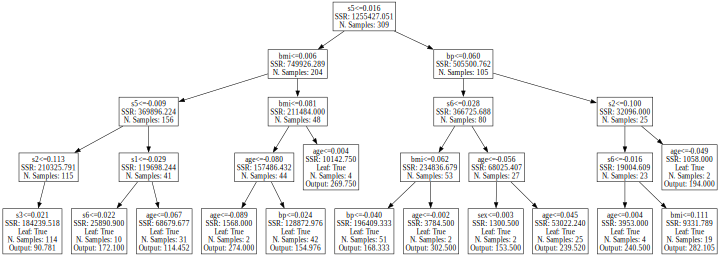

In [17]:
plot_tree(dtr)

#### Random Forest Regressor

In [18]:
from rlearn.tree import RandomForestRegressor

forest = RandomForestRegressor(
    max_depth=5, n_estimators=100, bootstrap_size=int(np.sqrt(len(X_train)))
)
forest.fit(X_train, y_train, X_test, y_test, verbose=20)

print("Mean Squared Error:", mean_squared_error(y_test, forest.predict(X_test)))

Train Loss: 6924.2985436893205	Test Loss: 7429.550751879699
Train Loss: 3444.4922090558625	Test Loss: 3511.521617677982
Train Loss: 3404.696084029213	Test Loss: 3358.215142359746
Train Loss: 3431.0277654620168	Test Loss: 3331.212133298764
Train Loss: 3396.010832180022	Test Loss: 3239.346190036833
Train Loss: 3337.2318168588963	Test Loss: 3183.187560712699
Mean Squared Error: 3183.187560712699


#### Gradient Boosting Regressor

In [19]:
from rlearn.tree import GradientBoostRegressor

gbr = GradientBoostRegressor(
    max_depth=3,
    frac_of_samples=0.7,
    min_samples_split=20,
    max_features=4,
    n_estimators=30,
)
gbr.fit(X_train, y_train, X_test, y_test, verbose=10)

print("Mean Squared Error:", mean_squared_error(y_test, gbr.predict(X_test)))

Estimators: 0	Train Loss: 5531.247700008249	Validation Loss: 5238.615688792034
Estimators: 10	Train Loss: 3117.8096838774745	Validation Loss: 3527.6197650283116
Estimators: 20	Train Loss: 2379.550378164687	Validation Loss: 3097.2332912319457
Estimators: 29	Train Loss: 1961.3497145248737	Validation Loss: 3096.2922869241274
Mean Squared Error: 3058.39801532374


### Classification with Trees

Dataset used for classification with Trees.

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

#### Decision Tree Classifier

In [23]:
from rlearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, min_samples_split=20)
dtc.fit(X_train, y_train)

print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.88      1.00      0.93        21
           2       1.00      0.93      0.96        14

    accuracy                           0.94        54
   macro avg       0.96      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



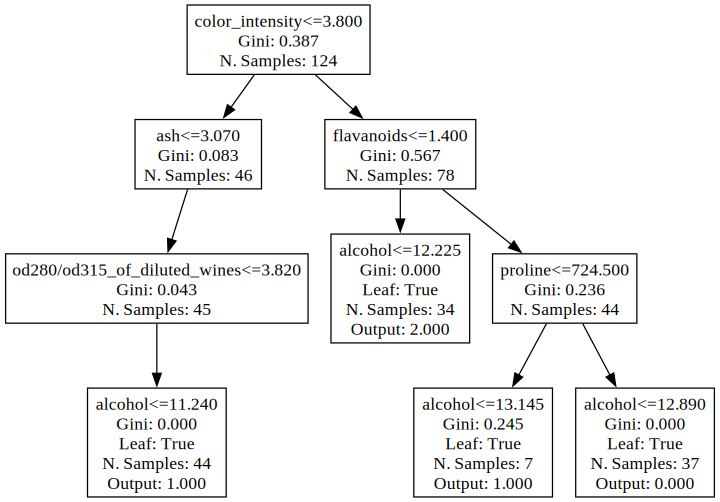

In [24]:
plot_tree(dtc)

#### Random Forest Classifier

In [25]:
from rlearn.tree import RandomForestClassifier

forest = RandomForestClassifier(max_depth=10, n_estimators=100)
forest.fit(X_train, y_train, X_test, y_test, verbose=20)

print(classification_report(y_test, forest.predict(X_test)))

Train Loss: 1.0	Test Loss: 0.9259259259259259
Train Loss: 1.0	Test Loss: 0.9814814814814815
Train Loss: 1.0	Test Loss: 1.0
Train Loss: 1.0	Test Loss: 1.0
Train Loss: 1.0	Test Loss: 1.0
Train Loss: 1.0	Test Loss: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



#### Gradient Boosting Classifier

In [26]:
from rlearn.tree import GradientBoostClassifier

gbc = GradientBoostClassifier(
    n_estimators=200,
    max_depth=5,
    frac_of_samples=0.3,
    max_features=int(np.sqrt(X_train.shape[1])),
)
gbc.fit(X_train, y_train, X_test, y_test, verbose=40)

print(classification_report(y_test, gbc.predict(X_test)))

Estimators: 0	Train Loss: 0.4032258064516129	Validation Loss: 0.3888888888888889
Estimators: 40	Train Loss: 1.0	Validation Loss: 1.0
Estimators: 80	Train Loss: 1.0	Validation Loss: 0.9814814814814815
Estimators: 120	Train Loss: 1.0	Validation Loss: 1.0
Estimators: 160	Train Loss: 1.0	Validation Loss: 1.0
Estimators: 199	Train Loss: 1.0	Validation Loss: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## [Clusters](rlearn/cluster.py)  
<sub>[Back to top.](#table-of-contents)</sub>

Dataset used for clustering.

In [27]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

#### K-Means

In [28]:
from rlearn.cluster import KMeans

kmeans = KMeans(k=3)
kmeans.fit(X[:, [0, 1]])
_ = kmeans.make_animation(X[:, [0, 1]], interval=1000)

![K-Means training.](README_files/kmeans.gif)

#### DBSCAN

In [29]:
from rlearn.cluster import DBSCAN

d = DBSCAN(eps=0.3, algorithm="brute")
d.fit(X[:, [0, 1]])
d.make_animation(X)

it may take a while...
Done!


![DBSCAN training.](README_files/dbscan.gif)

## [Neighbors](rlearn/neighbour.py)
<sub>[Back to top.](#table-of-contents)</sub>

### Classification with KNN

Dataset used for classification with neighbours algorithms.

In [30]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

#### K-Nearest Neighbours Classifier

In [31]:
from rlearn.neighbour import KNearestNeighbors

knn = KNearestNeighbors(14)
knn.fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.82      0.64      0.72        14
           2       0.44      0.50      0.47         8

    accuracy                           0.75        36
   macro avg       0.71      0.71      0.71        36
weighted avg       0.76      0.75      0.75        36



### Regression with KNN

Dataset used for regression.

In [32]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.20, random_state=42, shuffle=True
)

#### K-Nearest Neighbours Regressor

In [33]:
from rlearn.neighbour import KNearestNeighborsRegressor

knnr = KNearestNeighborsRegressor(10)
knnr.fit(X_train, y_train)
mean_squared_error(y_test, knnr.predict(X_test))

1.1590791278976151

## [Bayes](rlearn/bayes.py)
<sub>[Back to top.](#table-of-contents)</sub>

#### GaussianNB

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

In [4]:
from rlearn.bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



<sub>[Back to top.](#table-of-contents)</sub>